In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
import random 

### Reading data

In [15]:
points_left=np.loadtxt("Data/Epipolar/points_left")
points_right=np.loadtxt("Data/Epipolar/points_right")

F=np.loadtxt("Data/Epipolar/F")
K=np.loadtxt("Data/Epipolar/K")
R=np.loadtxt("Data/Epipolar/R")
T=np.loadtxt("Data/Epipolar/t")

leftImg=plt.imread("Data/Epipolar/left.jpg")
rightImg=plt.imread("Data/Epipolar/right.jpg")

points_left

array([[  12.3, 1186.2],
       [  12.9,  906.2],
       [  13.1,  922.9],
       ...,
       [2797.4, 1185.1],
       [2801.2,  708.2],
       [2801.4,  551. ]])

### Visualizing data

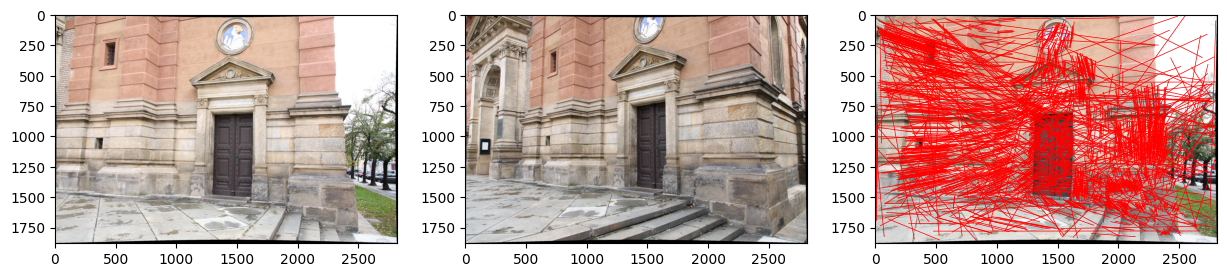

In [16]:
fig,axs=plt.subplots(1,3,figsize=(15,3))

axs[0].imshow(leftImg)
axs[1].imshow(rightImg)
axs[2].imshow(leftImg)

for i,j in zip(points_left,points_right):
    axs[2].plot((i[0],j[0]),(i[1],j[1]),linewidth=0.5,color="red")


In [17]:
class EpipolarSystem:
    def __init__(self,F,K,R,T):
        self.F=F
        self.K=K
        self.R=R
        self.T=T

    def _getEpipolarLines(self,point1:np.array,point2:np.array):
        point1=np.append(point1,1)
        point2=np.append(point2,1)
        l1=self.F.T@point2
        l2=self.F@point1
        return l1,l2

    def _getSymmetricEpipolarDistance(self,line1:np.array,line2:np.array,point1:np.array,point2:np.array):
        distance1=self._linePointDistance(line1,point1)
        distance2=self._linePointDistance(line2,point2)
        return pow(distance1*distance1+distance2*distance2,0.5)/2
    

    def _linePointDistance(self,line:np.array,point:np.array):
        numerator=abs(line[0]*point[0]+line[1]*point[1]+line[2])
        denominator=pow(line[0]*line[0]+line[1]*line[1],0.5)
        return numerator/denominator

    def sortOutlier(self,delta:float,pointsLeft,pointsRight):
        length=max(pointsLeft.shape[0],pointsRight.shape[1])
        positivePoints=[]
        positiveLines=[]
        negativePoints=[]
        negativeLines=[]
        for i in range(length):
            p1,p2=pointsLeft[i],pointsRight[i]
            l1,l2=self._getEpipolarLines(p1,p2)
            symmDist=self._getSymmetricEpipolarDistance(l1,l2,p1,p2)
            if symmDist<delta:
                positivePoints.append(np.array([p1,p2]))
                positiveLines.append(np.array([l1,l2]))
            else:
                negativePoints.append(np.array([p1,p2]))
                negativeLines.append(np.array([l1,l2]))
        return (positivePoints,positiveLines,negativePoints,negativeLines)


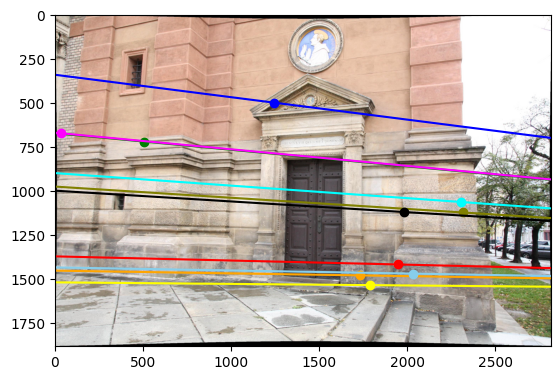

In [23]:
epipolar=EpipolarSystem(F,K,R,T)

posP,posL,negP,negL=epipolar.sortOutlier(1,points_left,points_right)

def line(x,m,b):
    return m*x+b

def line_distance(line:np.array,point:np.array):
    return 


plt.imshow(leftImg)

xDat=np.arange(0,leftImg.shape[1])

colors=["red","orange","green","blue","olive","cyan","yellow","black","magenta","skyblue"]

numSamples=10
list=random.sample([x for x in range(len(posP))],numSamples)

for i in range(numSamples):
    index=list[i]
    l=posL[index][0]
    p=posP[index][0]
    line_data=[line(x,-l[0]/l[1],-l[2]/l[1]) for x in xDat ]
    plt.plot(xDat,line_data,color=colors[i])
    plt.plot(p[0],p[1],"o",color=colors[i])


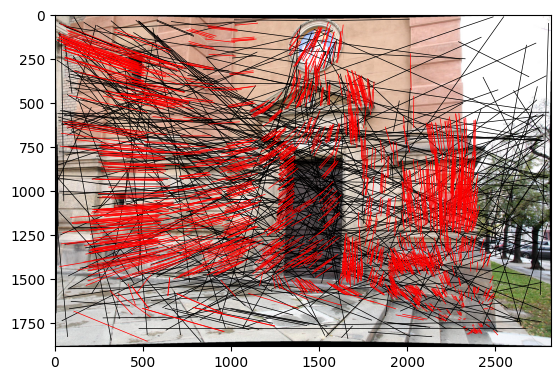

In [31]:
plt.imshow(leftImg)

for point in negP:
    p1=point[0]
    p2=point[1]
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],color="black",linewidth="0.5")

for point in posP:
    p1=point[0]
    p2=point[1]
    plt.plot([p1[0],p2[0]],[p1[1],p2[1]],color="red",linewidth="0.5")